In [8]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import DataReader
from datetime import datetime

Using the top ten crypto stocks for this analysis as per:

https://www.nerdwallet.com/article/investing/cryptocurrency-stocks

In [9]:
tech_list = ['COIN','MSTR','NVDA','MARA', 'SQ', 'SI', 'RIOT',
             'AMD', 'PYPL', 'CME']

In [21]:
#Setting the end date to today
end = datetime.now()

#Start date set to 2 year back
start = datetime(end.year-2,end.month,end.day)

#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [18]:
#testing if the global variable worked 
COIN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-14,429.540009,310.000000,381.000000,328.279999,81065700,328.279999
2021-04-15,349.200012,317.269989,348.899994,322.750000,39777900,322.750000
2021-04-16,345.989990,321.029999,327.500000,342.000000,22654500,342.000000
2021-04-19,341.010010,326.790009,337.260010,333.000000,11405600,333.000000
2021-04-20,334.829987,312.019989,333.429993,320.820007,18082300,320.820007


In [22]:
# Basic stats for Coinbase Stock
COIN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,306.000000,306.000000,306.000000,306.000000,3.060000e+02,306.000000
mean,224.372761,211.890139,218.462190,217.680229,7.006012e+06,217.680229
std,77.297444,74.300071,75.872869,75.530293,8.130359e+06,75.530293
min,51.454899,40.830002,46.180000,50.020000,1.574700e+06,50.020000
25%,188.932499,173.882496,180.735001,179.117500,3.427075e+06,179.117500
50%,238.885002,229.139999,233.455002,233.830002,4.557750e+06,233.830002
75%,266.232498,253.575005,260.229988,258.352493,7.530175e+06,258.352493
max,429.540009,345.559998,381.000000,357.390015,8.106570e+07,357.390015


In [24]:
#Some basic info about the dataframe
COIN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306 entries, 2021-04-14 to 2022-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       306 non-null    float64
 1   Low        306 non-null    float64
 2   Open       306 non-null    float64
 3   Close      306 non-null    float64
 4   Volume     306 non-null    int64  
 5   Adj Close  306 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 16.7 KB


We can see that there is no missing data and we may proceed

### What's the change in the stock's price over time?

<AxesSubplot:xlabel='Date'>

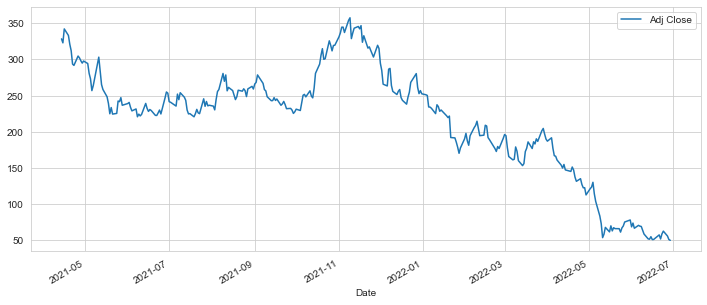

In [25]:
#Plotting the stock's adjusted closing price using pandas
COIN['Adj Close'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

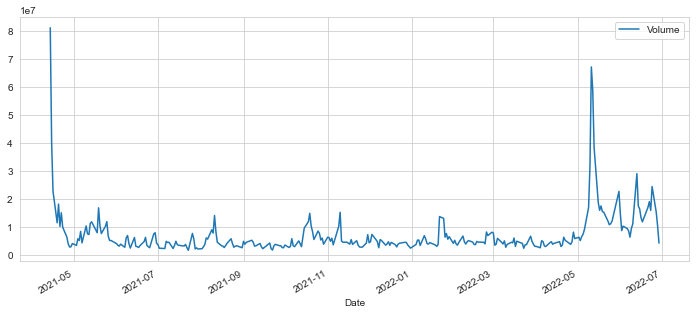

In [27]:
#Plotting the total volume being traded over time
COIN['Volume'].plot(legend=True,figsize=(12,5))

### What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [28]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    COIN[column_name] = COIN['Adj Close'].rolling(window=ma,center=False).mean()

COIN.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-06-23,59.619999,51.830002,53.599998,58.880001,15840700,58.880001,55.162,63.033000,88.6124
2022-06-24,64.089996,59.330002,60.000000,62.709999,24357700,62.709999,55.057,62.810000,86.8696
2022-06-27,60.450001,55.020000,59.560001,55.959999,15201600,55.959999,54.782,62.114499,84.8930
2022-06-28,57.250000,50.330002,56.259998,51.180000,10253500,51.180000,54.699,60.907500,82.9708
2022-06-29,51.454899,48.912701,50.500000,50.020000,4153534,50.020000,54.543,59.503500,81.0680


<AxesSubplot:xlabel='Date'>

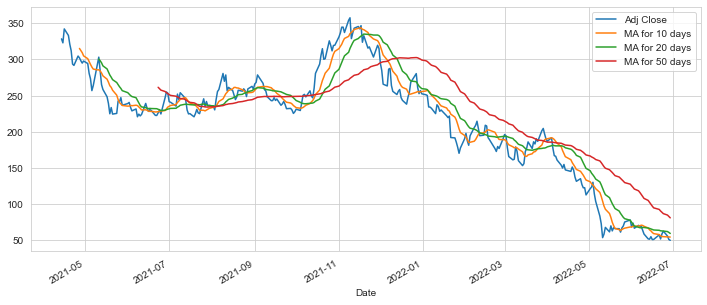

In [29]:
COIN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

### What was the daily return average of a stock?

In [31]:
#The daily return column can be created by using the percentage change over the adjusted closing price
COIN['Daily Return'] = COIN['Adj Close'].pct_change()
COIN['Daily Return'].tail()

Date
2022-06-23    0.134271
2022-06-24    0.065048
2022-06-27   -0.107638
2022-06-28   -0.085418
2022-06-29   -0.022665
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

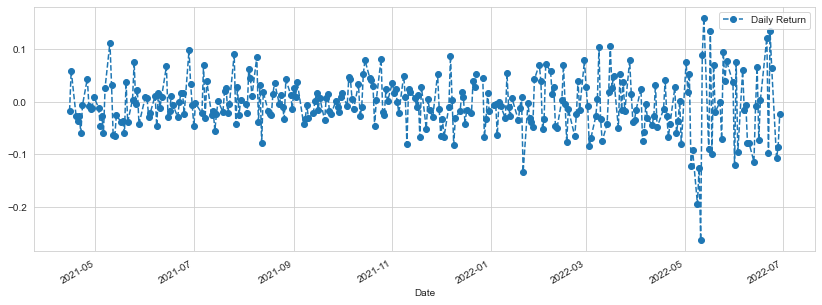

In [34]:
#Plotting the daily return
COIN['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

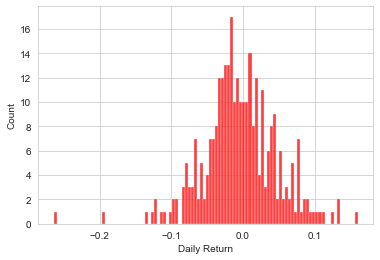

In [35]:
sns.histplot(x=COIN['Daily Return'].dropna(),bins=100,color='red')

Positive daily returns seem to be slightly more frequent than negative returns for Coinbase

### What was the correlation between daily returns of different stocks?

In [37]:
#Reading just the 'Adj Close' column this time
close_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']
close_df.tail()

Symbols,COIN,MSTR,NVDA,MARA,SQ,SI,RIOT,AMD,PYPL,CME
Date,,,,,,,,,,
2022-06-23,58.880001,188.309998,162.250000,7.05,67.269997,59.860001,4.94,82.430000,73.809998,208.460007
2022-06-24,62.709999,205.440002,171.259995,7.42,71.000000,63.450001,5.19,87.080002,77.680000,210.000000
2022-06-27,55.959999,196.729996,168.690002,6.85,69.430000,62.639999,4.89,86.160004,75.940002,209.440002
2022-06-28,51.180000,186.119995,159.820007,6.43,65.599998,58.570000,4.76,80.779999,71.820000,206.119995
2022-06-29,49.750000,179.690002,155.419998,5.80,63.840000,57.500000,4.50,77.989998,71.470001,206.149994


Everything works as expected.

Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [38]:
rets_df = close_df.pct_change()
rets_df.tail()

Symbols,COIN,MSTR,NVDA,MARA,SQ,SI,RIOT,AMD,PYPL,CME
Date,,,,,,,,,,
2022-06-23,0.134271,0.101808,-0.008252,0.044444,0.109151,0.062855,0.073913,-0.015761,0.011512,0.000000
2022-06-24,0.065048,0.090967,0.055532,0.052482,0.055448,0.059973,0.050607,0.056412,0.052432,0.007387
2022-06-27,-0.107638,-0.042397,-0.015006,-0.076819,-0.022113,-0.012766,-0.057804,-0.010565,-0.022400,-0.002667
2022-06-28,-0.085418,-0.053932,-0.052582,-0.061314,-0.055164,-0.064974,-0.026585,-0.062442,-0.054253,-0.015852
2022-06-29,-0.027941,-0.034548,-0.027531,-0.097978,-0.026829,-0.018269,-0.054622,-0.034538,-0.004873,0.000146


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

C:\Users\Paklap\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


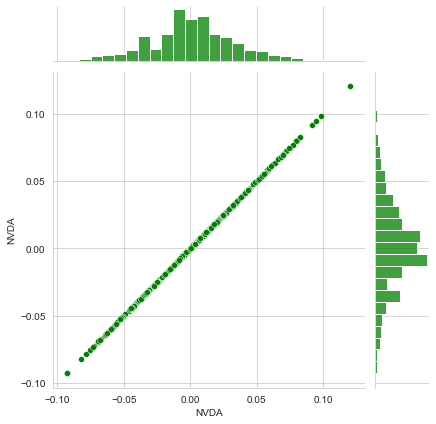

In [40]:
sns.jointplot('NVDA','NVDA',rets_df,kind='scatter',color='green')


As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Coinbase and Nvidia's daily returns.

C:\Users\Paklap\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


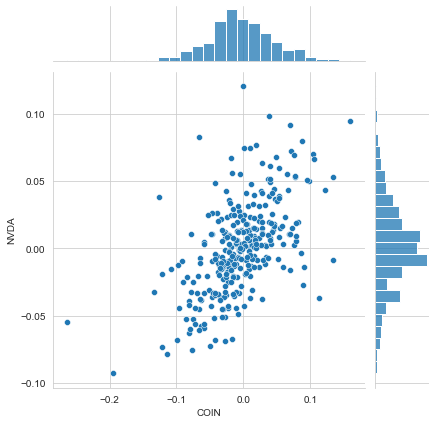

In [69]:
sns.jointplot('COIN','NVDA',rets_df,kind='scatter')

There seems to be a minor correlation between the two stocks, looking at the figure above. 

But what about other stock combinations?

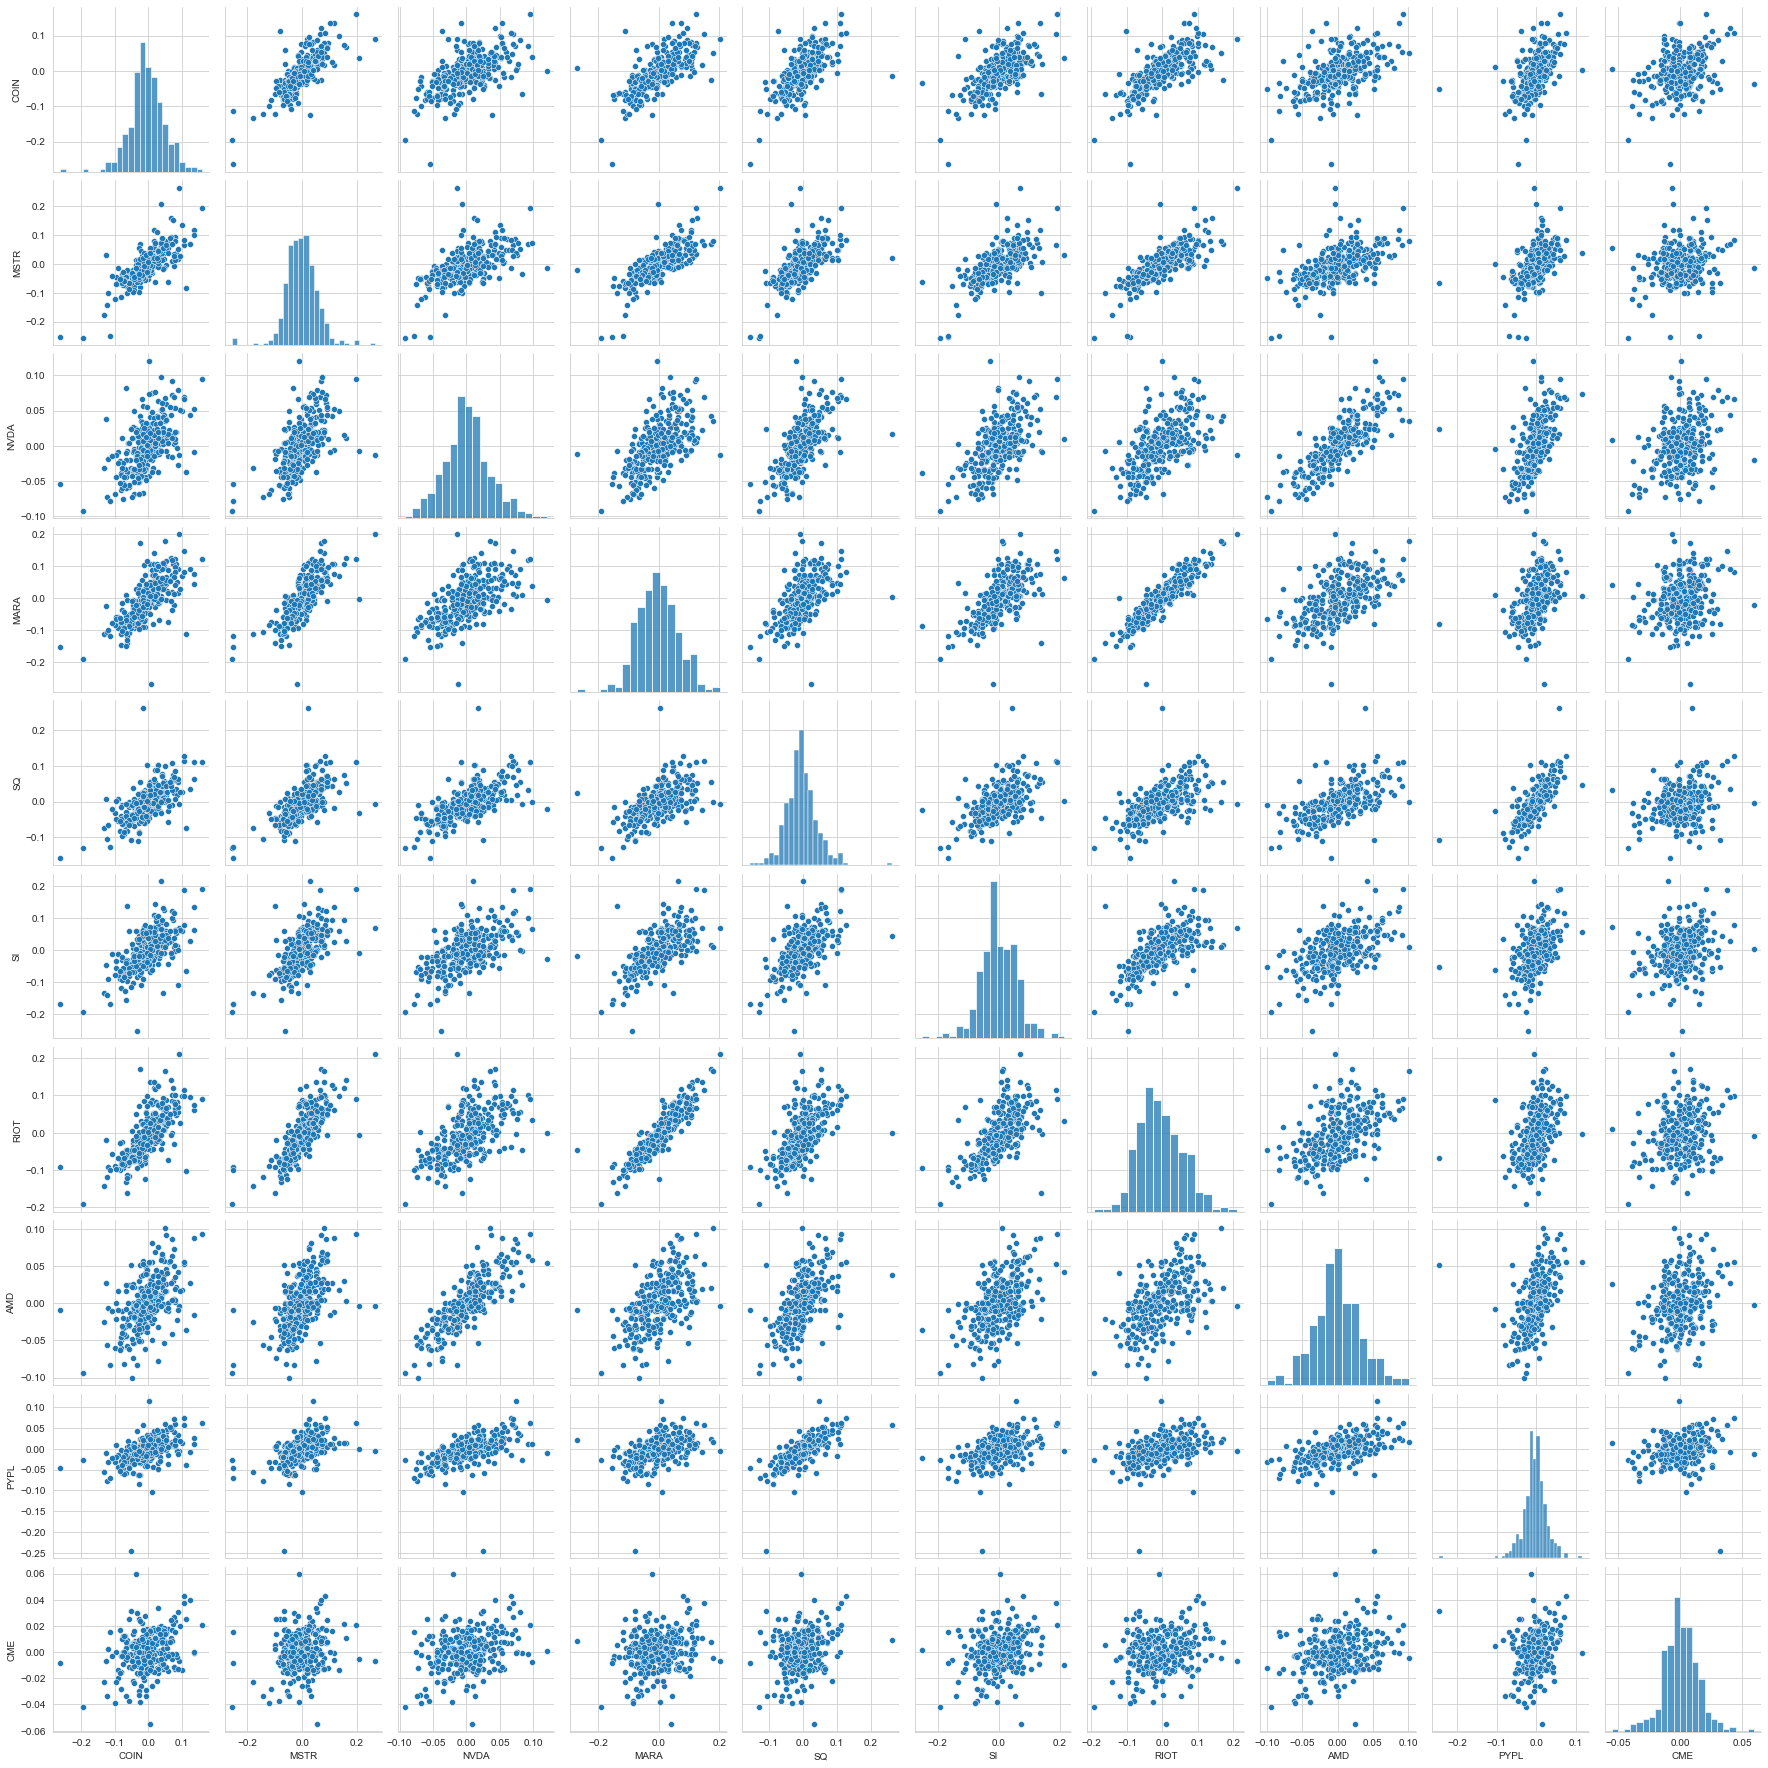

In [44]:
sns.pairplot(rets_df.dropna())

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks.

This lets us quickly glance across and spot significant trends. 

They all appear to show a slight positive correlation except for CME which appears to be largely uncorrelated with all the stocks.

We can next consider heatmaps.

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

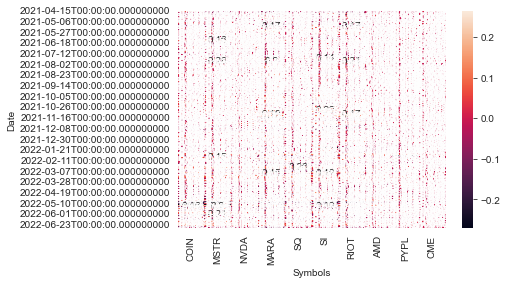

In [45]:
sns.heatmap(rets_df.dropna(),annot=True)

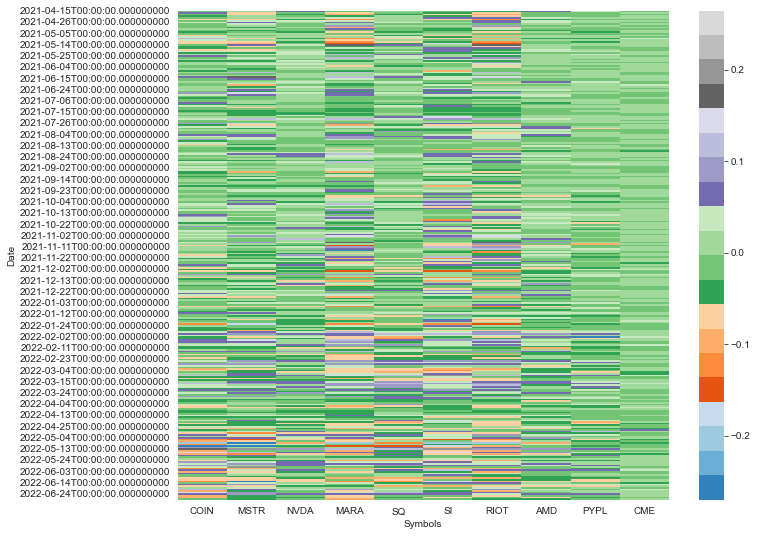

In [62]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(rets_df.dropna(), cmap="tab20c")
plt.show()

These heatmaps appear to be too messy to derive true insight from. 

It may be worth exploring a correlation matrix and an accompanying heatmap. 

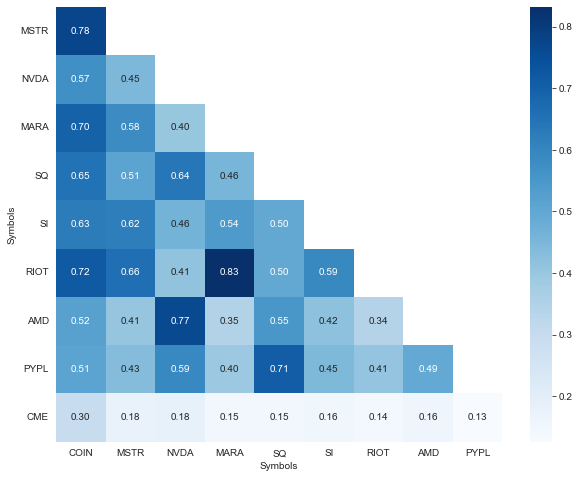

In [72]:
df_corr = rets_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues')
# yticks
plt.yticks(rotation=0)
plt.show()

This heatmap visualization proves to be far more useful in deriving insights.

COIN appears to have the highest correlation levels with other stocks

CME appears to have the lowest correlation levels with other stocks

The 5 highest correlation pairs are
    MARA-RIOT,
    COIN-MSTR,
    NVDA-AMD,
    COIN-RIOT,
    SQ-PYPL

### How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

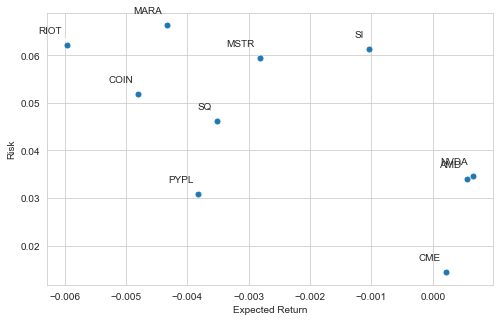

In [82]:
rets = rets_df.dropna()
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#For adding annotations in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-5,10),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

We'd want a stock to have a high expected return and a low risk.

CME, AMD, and NVDA seem to be the safe options for that. 

Meanwhile, the least safe options appear to be RIOT, COIN, and MARA.

### Can we attempt to predict future stock behaviour?
#### Implementing the Monte Carlo method

As part of the Monte Carlo method, we will attempt to run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.

In [84]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['COIN']

sigma = rets.std()['COIN']
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We're going to run the simulation of Coinbase stocks. 

Let's check out the opening value of the stock.

In [86]:
COIN.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-04-14,429.540009,310.000000,381.000000,328.279999,81065700,328.279999,NaN,NaN,NaN,NaN
2021-04-15,349.200012,317.269989,348.899994,322.750000,39777900,322.750000,NaN,NaN,NaN,-0.016845
2021-04-16,345.989990,321.029999,327.500000,342.000000,22654500,342.000000,NaN,NaN,NaN,0.059644
2021-04-19,341.010010,326.790009,337.260010,333.000000,11405600,333.000000,NaN,NaN,NaN,-0.026316
2021-04-20,334.829987,312.019989,333.429993,320.820007,18082300,320.820007,NaN,NaN,NaN,-0.036577


We will do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Coinbase')

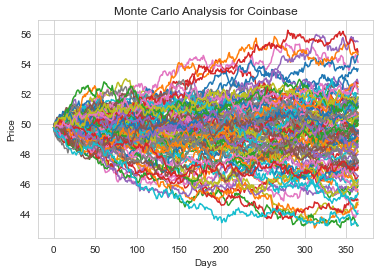

In [92]:
start_price = 49.75 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Coinbase')

Text(0.5, 1.0, 'Final price distribution for Coinbase Stock after 365 days')

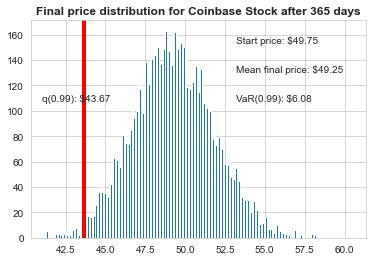

In [93]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Coinbase Stock after %s days" %days, weight='bold')


We can infer from this that Coinbase's stock appears to follow a slight negative trajectory, with a relatively high variability. This confirms what we saw in the Risk vs Expected Return charts we saw earlier.

The starting price that we had was USD 49.75, and the average final price over 10,000 runs was USD 49.25.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD 6.08, 99% of the time. For context, this is 12.2% of the start price.

In [ ]:
correlation of snp 500, bitc, eth, us fed liquidity, tech etf